In [1]:
import os
from ast import literal_eval
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data

#### Flu data

In [3]:
flu_df = pd.read_csv('../data/clean_flu_data.csv')
flu_df.head()

,date,Texas,Louisiana,Washington,New Jersey,Arkansas,Montana,North Dakota,Nebraska,New Mexico,...,Maine,Nevada,Idaho,Utah,Virginia,New York,District of Columbia,Oklahoma,South Dakota,Colorado
0,2010-40,2.06514,2.28108,0.510041,2.31534,0.696056,0.037119,0.671355,2.199780,2.13191,...,0.357724,1.66683,0.414938,0.747696,1.14343,0.262990,2.80877,0.624179,1.102750,0.660684
1,2010-41,2.09394,2.04776,1.040070,2.47836,0.674157,0.180963,0.721961,2.735320,1.96350,...,0.434855,1.63633,1.457980,0.410939,1.23653,0.369729,2.89079,0.958678,0.793794,0.628621
2,2010-42,2.10072,2.42974,0.904393,2.24812,0.514217,0.185874,0.567477,3.311030,1.67486,...,0.421743,1.50860,1.408140,0.440583,1.22545,0.362121,2.41042,2.070390,0.791023,0.804020
3,2010-43,2.20655,1.92854,0.955110,2.79286,0.413650,0.036390,0.339239,2.057610,2.35498,...,0.338409,2.14451,1.280070,0.755957,1.26902,0.358981,3.11632,1.670730,0.801311,0.909658
4,2010-44,2.36381,2.80934,0.786370,1.82877,1.090280,0.040519,0.713749,0.376712,2.37983,...,0.176471,1.76761,1.827240,0.651859,1.26547,0.527357,2.99118,1.628450,0.779833,0.971705


In [4]:
flu_df.columns

Index(['date', 'Texas', 'Louisiana', 'Washington', 'New Jersey', 'Arkansas',
       'Montana', 'North Dakota', 'Nebraska', 'New Mexico', 'Indiana',
       'California', 'Ohio', 'South Carolina', 'Rhode Island', 'Michigan',
       'Georgia', 'Wyoming', 'Hawaii', 'New Hampshire', 'Maryland',
       'Mississippi', 'Connecticut', 'West Virginia', 'Iowa', 'Illinois',
       'Vermont', 'Tennessee', 'Missouri', 'Wisconsin', 'North Carolina',
       'Pennsylvania', 'Kentucky', 'Delaware', 'Kansas', 'Oregon',
       'Massachusetts', 'Alabama', 'Alaska', 'Arizona', 'Minnesota', 'Maine',
       'Nevada', 'Idaho', 'Utah', 'Virginia', 'New York',
       'District of Columbia', 'Oklahoma', 'South Dakota', 'Colorado'],
      dtype='object')

#### Data with Google Trend By state

In [5]:
texas_train = pd.read_csv('../data/state_flu_google/train/Texas.csv')
texas_test = pd.read_csv('../data/state_flu_google/test/Texas.csv')
texas_train.head()

,date,texas_flu,flu,treating flu,medicine for the flu,high fever,is the flu contagious,get over the flu,medicine for flu,how to get rid of the flu,...,flu in children,do i have the flu,i have the flu,influenza incubation period,flu season,oscillococcinum,what is the flu,low body,remedies for the flu,target
0,2010-40,2.06514,10.0,0.0,0.0,36.0,5.0,0.0,5.0,5.0,...,3.0,10.0,1.0,1.0,6.0,3.0,15.0,11.0,0.0,2.09394
1,2010-41,2.09394,10.0,0.0,0.0,36.0,5.0,0.0,5.0,5.0,...,3.0,10.0,1.0,1.0,6.0,3.0,15.0,11.0,0.0,2.10072
2,2010-42,2.10072,10.0,0.0,0.0,36.0,5.0,0.0,5.0,5.0,...,3.0,10.0,1.0,1.0,6.0,3.0,15.0,11.0,0.0,2.20655
3,2010-43,2.20655,10.0,0.0,0.0,36.0,5.0,0.0,5.0,5.0,...,3.0,10.0,1.0,1.0,6.0,3.0,15.0,11.0,0.0,2.36381
4,2010-44,2.36381,10.0,0.0,0.0,36.0,5.0,0.0,5.0,5.0,...,3.0,10.0,1.0,1.0,6.0,3.0,15.0,11.0,0.0,2.51778


In [6]:
newyork_train = pd.read_csv('../data/state_flu_google/train/New York.csv')
newyork_test = pd.read_csv('../data/state_flu_google/test/New York.csv')
newyork_train.head()

,date,new_york_flu,flu,treating flu,medicine for the flu,high fever,is the flu contagious,get over the flu,medicine for flu,how to get rid of the flu,...,flu in children,do i have the flu,i have the flu,influenza incubation period,flu season,oscillococcinum,what is the flu,low body,remedies for the flu,target
0,2010-40,0.262990,15.0,6.0,6.0,44.0,6.0,0.0,0.0,0.0,...,5.0,2.0,5.0,0.0,8.0,11.0,9.0,26.0,0.0,0.369729
1,2010-41,0.369729,15.0,6.0,6.0,44.0,6.0,0.0,0.0,0.0,...,5.0,2.0,5.0,0.0,8.0,11.0,9.0,26.0,0.0,0.362121
2,2010-42,0.362121,15.0,6.0,6.0,44.0,6.0,0.0,0.0,0.0,...,5.0,2.0,5.0,0.0,8.0,11.0,9.0,26.0,0.0,0.358981
3,2010-43,0.358981,15.0,6.0,6.0,44.0,6.0,0.0,0.0,0.0,...,5.0,2.0,5.0,0.0,8.0,11.0,9.0,26.0,0.0,0.527357
4,2010-44,0.527357,15.0,6.0,6.0,44.0,6.0,0.0,0.0,0.0,...,5.0,2.0,5.0,0.0,8.0,11.0,9.0,26.0,0.0,0.504756


In [7]:
def normalize_google_trend(google_df):
    for col in google_df.columns: 
        google_df[col] = (google_df[col]-google_df[col].min())/(google_df[col].max()-google_df[col].min())
    return google_df

## Model

### Baseline

In [8]:
def baseline(train, test):
    # Use the most recent observation to predict future weeks
    flu_train, flu_test = train.iloc[:, 1], test.iloc[:, 1]
    preds = [flu_train.iloc[-1]]*len(flu_test)     
    return np.sqrt(mean_squared_error(flu_test, preds))

In [9]:
baseline(texas_train, texas_test)

4.274130687195383

In [10]:
baseline(newyork_train, newyork_test)

2.4671586642026044

### Linear Autoregression

In [11]:
# def auto_regression(train, test, window, if_plot=True):
#     flu_train, flu_test = train.iloc[:, 1], test.iloc[:, 1]
#     # train
#     model = AutoReg(flu_train, lags=window).fit()
#     coef = model.params
    
#     # predict
#     history = flu_train[len(flu_train)-window:].tolist()
#     preds = []
#     for t in range(len(flu_test)):
#         N = len(history)
#         lag = [history[i] for i in range(N - window, N)]
#         yhat = coef[0]
        
#         for w in range(window):
#             yhat += coef[w+1] * lag[window-w-1]
            
#         preds.append(yhat)
#         history.append(flu_test[t])
        
#     print('Test RMSE: ', np.sqrt(mean_squared_error(flu_test, preds)))
    
#     # plot
#     if if_plot:
#         plt.figure(figsize = [15, 6])
#         plt.plot(flu_test, label='true')
#         plt.plot(preds, label='predicted')
#         plt.legend()
#         plt.show()      
# #     return preds

In [12]:
def auto_regression(train, test, lag=52, with_gt=False, if_plot=True):
    # prepare the data
    X_train, X_test = pd.DataFrame(), pd.DataFrame() # flu data
    y_train, y_test = train.target, test.target
    
    # get autoregressive terms
    for i in range(lag): # 52 lags to cover the whole year
        X_train['lag {}'.format(i+1)] = train.iloc[:, 1].shift(i+1)
        train_na = X_train['lag {}'.format(i+1)][X_train['lag {}'.format(i+1)].notna()].iloc[0]
        X_train['lag {}'.format(i+1)] = X_train['lag {}'.format(i+1)].fillna(train_na)
        
        X_test['lag {}'.format(i+1)] = test.iloc[:, 1].shift(i+1)
        test_na = X_test['lag {}'.format(i+1)][X_test['lag {}'.format(i+1)].notna()].iloc[0]
        X_test['lag {}'.format(i+1)] = X_test['lag {}'.format(i+1)].fillna(test_na)
    
    if with_gt:
        X_train_gt, X_test_gt = train.iloc[:, 2:-1], test.iloc[:, 2:-1] # google trend data
#         X_train_gt = normalize_google_trend(X_train_gt).fillna(0)
#         X_test_gt = normalize_google_trend(X_test_gt).fillna(0)
        ar_model = Lasso(fit_intercept = False).fit(X_train, y_train)
        ar_train = pd.DataFrame(ar_model.predict(X_train))
        ar_test = pd.DataFrame(ar_model.predict(X_test))

        gt_model = Lasso(fit_intercept = False).fit(X_train_gt, y_train)
        gt_train = pd.DataFrame(gt_model.predict(X_train_gt))
        gt_test = pd.DataFrame(gt_model.predict(X_test_gt))

        X_train = pd.concat([ar_train, gt_train], axis=1)
        X_test = pd.concat([ar_test, gt_test], axis=1)
#         X_train, X_test = pd.concat([X_train, X_train_gt], axis = 1), pd.concat([X_test, X_test_gt], axis = 1)
    
    # model
    model = LinearRegression().fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    # plot
    if if_plot:
        plt.figure(figsize = [15, 6])
        plt.plot(y_test, label='true')
        plt.plot(preds, label='predicted')
        plt.legend()
        plt.show()    
    
    return rmse

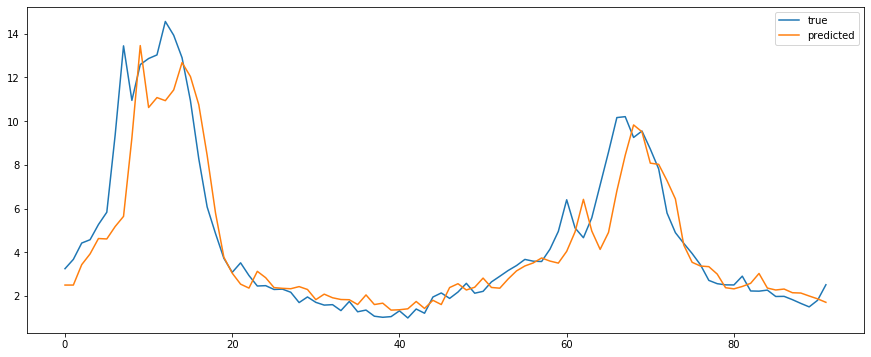

1.4490728276896612

In [13]:
# without google trend
auto_regression(texas_train,texas_test, lag=4)

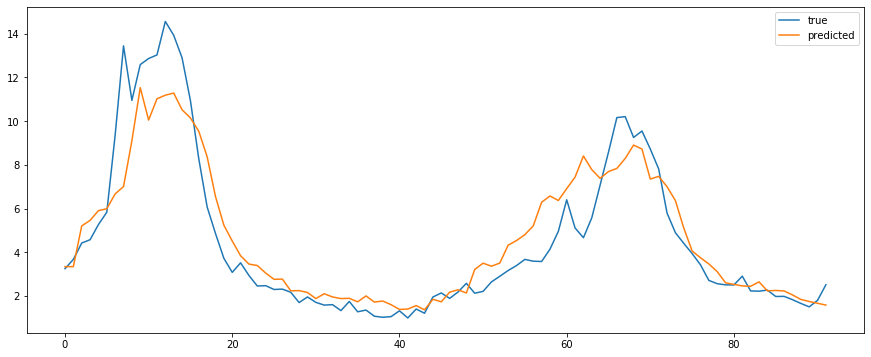

1.4038595009080828

In [14]:
# with google trend
auto_regression(texas_train,texas_test, with_gt = True)

In [15]:
# without google trend
auto_regression(newyork_train, newyork_test, lag=5, if_plot=False)

1.0462976722332704

In [16]:
# with google trend
auto_regression(newyork_train,newyork_test, with_gt = True, if_plot=False)

1.4013065550203672

### Linear Network Autoregression

In [17]:
def lnar(predict, train, test, lag=52, with_gt=False, if_plot=True):
    # get train test
    y_train, y_test = train.target, test.target
    predictors = flu_df[predict]
    size = int(flu_df.shape[0] * 0.8)
    train_predictors, test_predictors = predictors.iloc[:size], predictors.iloc[size:-1].reset_index(drop=True)
    X_train, X_test = pd.DataFrame(), pd.DataFrame()
    
    for i in range(lag):
        for col in train_predictors.columns:
            X_train['{} lag {}'.format(col, i+1)] = train_predictors[col].shift(i+1)
            na = X_train['{} lag {}'.format(col, i+1)][X_train['{} lag {}'.format(col, i+1)].notna()].iloc[0]
            X_train['{} lag {}'.format(col, i+1)] = X_train['{} lag {}'.format(col, i+1)].fillna(na)
        for col in test_predictors.columns:
            X_test['{} lag {}'.format(col, i+1)] = test_predictors[col].shift(i+1)
            na = X_test['{} lag {}'.format(col, i+1)][X_test['{} lag {}'.format(col, i+1)].notna()].iloc[0]
            X_test['{} lag {}'.format(col, i+1)] = X_test['{} lag {}'.format(col, i+1)].fillna(na)
      
    if with_gt:
        # google trend data
        X_train_gt, X_test_gt = train.iloc[:, 2:-1], test.iloc[:, 2:-1] # google trend data
#         X_train_gt = normalize_google_trend(X_train_gt).fillna(0)
#         X_test_gt = normalize_google_trend(X_test_gt).fillna(0)
            
        # model
        ar_model = Lasso(fit_intercept = False).fit(X_train, y_train)
        ar_train = pd.DataFrame(ar_model.predict(X_train))
        ar_test = pd.DataFrame(ar_model.predict(X_test))

        gt_model = Lasso(fit_intercept = False).fit(X_train_gt, y_train)
        gt_train = pd.DataFrame(gt_model.predict(X_train_gt))
        gt_test = pd.DataFrame(gt_model.predict(X_test_gt))

        X_train = pd.concat([ar_train, gt_train], axis=1)
        X_test = pd.concat([ar_test, gt_test], axis=1)
#         X_train, X_test = pd.concat([X_train, X_train_gt], axis = 1), pd.concat([X_test, X_test_gt], axis = 1)

    # model
    model = LinearRegression().fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    if if_plot:
        plt.figure(figsize = [15, 6])
        plt.plot(y_test.tolist(), label='true')
        plt.plot(pred, label='predicted')
        plt.legend()
        plt.show() 
        
    return rmse

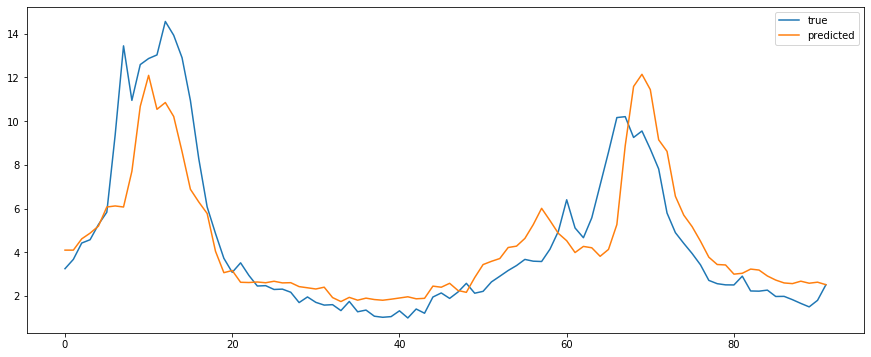

1.774691918408351

In [18]:
# Use surrounding states as predictors
# without google trend
lnar(['New Mexico', 'Oklahoma', 'Louisiana', 'Arkansas'], texas_train, texas_test, 1)

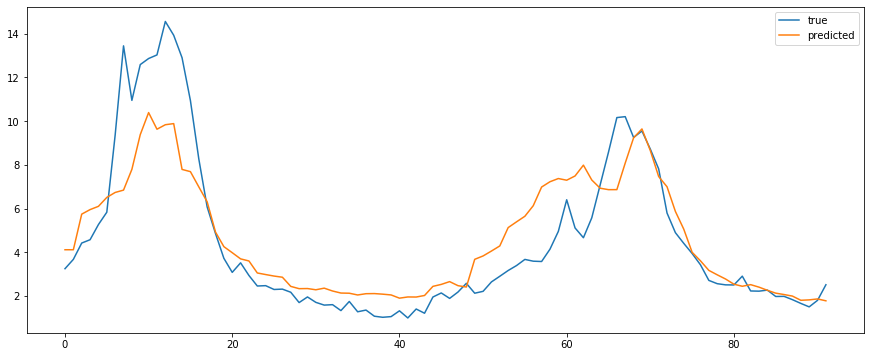

1.7516767891343596

In [19]:
lnar(['New Mexico', 'Colorado', 'Oklahoma', 'Louisiana', 'Arkansas'], texas_train, texas_test, with_gt=True)

In [20]:
# With Google Trend
lnar(['Pennsylvania', 'New Jersey', 'Connecticut', 'Massachusetts', 'Vermont'], newyork_train, newyork_test, 2, if_plot=False)

1.2960801810447287

In [21]:
# Without google trend
lnar(['Pennsylvania', 'New Jersey', 'Connecticut', 'Massachusetts', 'Vermont'], newyork_train, newyork_test, with_gt=True, if_plot=False)

2.028710121904101

### Random Forest

In [22]:
def random_forest(predict, train, test, lag=52, with_gt = False, if_plot = True):
    y_train, y_test = train.target, test.target
    predictors = flu_df[predict]
    size = int(flu_df.shape[0] * 0.8)
    train_predictors, test_predictors = predictors.iloc[:size], predictors.iloc[size:-1].reset_index(drop=True)
    X_train, X_test = pd.DataFrame(), pd.DataFrame()
    
    for i in range(lag):
        for col in train_predictors.columns:
            X_train['{} lag {}'.format(col, i+1)] = train_predictors[col].shift(i+1)
            na = X_train['{} lag {}'.format(col, i+1)][X_train['{} lag {}'.format(col, i+1)].notna()].iloc[0]
            X_train['{} lag {}'.format(col, i+1)] = X_train['{} lag {}'.format(col, i+1)].fillna(na)
        for col in test_predictors.columns:
            X_test['{} lag {}'.format(col, i+1)] = test_predictors[col].shift(i+1)
            na = X_test['{} lag {}'.format(col, i+1)][X_test['{} lag {}'.format(col, i+1)].notna()].iloc[0]
            X_test['{} lag {}'.format(col, i+1)] = X_test['{} lag {}'.format(col, i+1)].fillna(na)
            
    if with_gt:
        # google trend data
        X_train_gt, X_test_gt = train.iloc[:, 2:-1], test.iloc[:, 2:-1] # google trend data
        X_train_gt = normalize_google_trend(X_train_gt).fillna(0)
        X_test_gt = normalize_google_trend(X_test_gt).fillna(0)
            
        # model
        ar_model = Lasso(fit_intercept = False).fit(X_train, y_train)
        ar_train = pd.DataFrame(ar_model.predict(X_train))
        ar_test = pd.DataFrame(ar_model.predict(X_test))

        gt_model = Lasso(fit_intercept = False).fit(X_train_gt, y_train)
        gt_train = pd.DataFrame(gt_model.predict(X_train_gt))
        gt_test = pd.DataFrame(gt_model.predict(X_test_gt))

        X_train = pd.concat([ar_train, gt_train], axis=1)
        X_test = pd.concat([ar_test, gt_test], axis=1)
#         X_train, X_test = pd.concat([X_train, X_train_gt], axis = 1), pd.concat([X_test, X_test_gt], axis = 1)         

    rf = RandomForestRegressor(n_estimators=50, random_state=0)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    if if_plot:
        plt.figure(figsize = [15, 6])
        plt.plot(y_test.tolist(), label='true')
        plt.plot(pred, label='predicted')
        plt.legend()
        plt.show() 
    
    return rmse

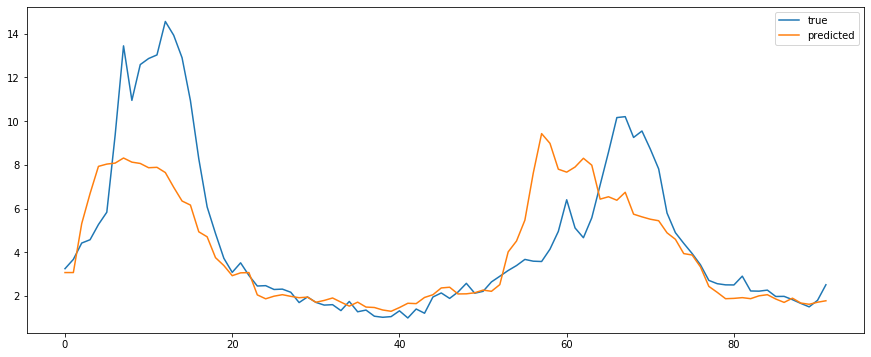

2.332494439361107

In [23]:
# without GT
random_forest(['New Mexico', 'Oklahoma', 'Louisiana', 'Arkansas'], texas_train, texas_test, lag=9)

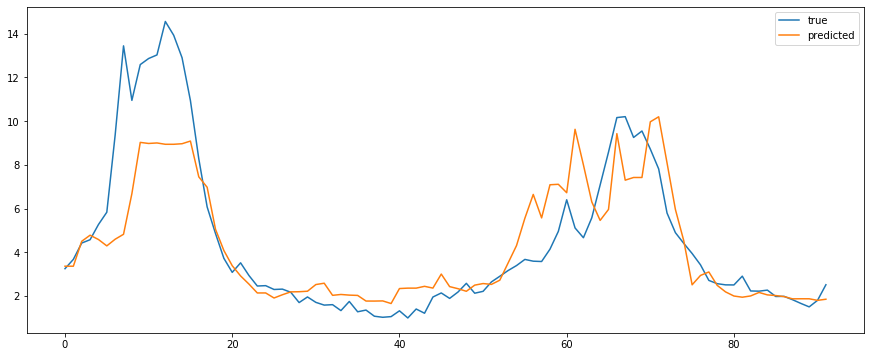

1.9796504624078402

In [24]:
# with GT
random_forest(['New Mexico', 'Oklahoma', 'Louisiana', 'Arkansas'], texas_train, texas_test, with_gt=True)

In [25]:
# without GT
random_forest(['Pennsylvania', 'New Jersey', 'Connecticut', 'Massachusetts', 'Vermont'], newyork_train, newyork_test, 11, if_plot=False)

1.387382904045168

In [26]:
# with GT
random_forest(['Pennsylvania', 'New Jersey', 'Connecticut', 'Massachusetts', 'Vermont'], newyork_train, newyork_test, with_gt=True, if_plot=False)

1.5863664534317568

## Run the models on all states

### Get the data

In [27]:
train_dfs, test_dfs = {}, {}
states = []
train_path = '../data/state_flu_google/train/'
test_path = '../data/state_flu_google/test/'

for root,dirs,files in os.walk(train_path):
    for file in files:
        if file.endswith('csv'):
            state = file[:-4]
            states.append(state)
            train_dfs[state] = pd.read_csv(train_path + file)

for root,dirs,files in os.walk(test_path):
    for file in files:
        if file.endswith('csv'):
            state = file[:-4]
            test_dfs[state] = pd.read_csv(test_path + file)

### Run the models and record RMSE

#### Baseline

In [28]:
baseline_rmse = []
for state in states:
    baseline_rmse.append(baseline(train_dfs[state], test_dfs[state]))

#### Linear Autoregression

In [29]:
# without google trend
ar_rmse = []
for state in states:
    ar_rmse.append(auto_regression(train_dfs[state], test_dfs[state], lag=5, with_gt=False, if_plot=False))

In [30]:
# with google trend
argt_rmse = []
for state in states:
    argt_rmse.append(auto_regression(train_dfs[state], test_dfs[state], lag=52, with_gt=True, if_plot=False))

#### Linear Network Autoregression

In [31]:
neighbors = pd.read_csv('../data/state_neighbors.csv').set_index('state')
neighbors['neigh_state'] = neighbors['neigh_state'].apply(literal_eval)
neighbors.head()

,neigh_state
state,
Alabama,"[Georgia, Mississippi, Tennessee]"
Alaska,[Washington]
Arizona,"[California, Colorado, New Mexico, Nevada, Utah]"
Arkansas,"[Louisiana, Missouri, Mississippi, Oklahoma, T..."
California,"[Hawaii, Nevada, Oregon]"


In [32]:
# without google trend
lar_rmse = []
for state in states:
    predict = neighbors.loc[state, 'neigh_state']
    lar_rmse.append(lnar(predict, train_dfs[state], test_dfs[state], lag=2, with_gt=False, if_plot=False))

In [33]:
# with google trend
largt_rmse = []
for state in states:
    largt_rmse.append(lnar(predict, train_dfs[state], test_dfs[state], lag=52, with_gt=True, if_plot=False))

#### Random Forest

In [34]:
# without google trend
rf_rmse = []
for state in states:
    predict = neighbors.loc[state, 'neigh_state']
    rf_rmse.append(random_forest(predict,train_dfs[state], test_dfs[state], lag=10, with_gt = False, if_plot = False))

In [35]:
# with google trend
rfgt_rmse = []
for state in states:
    predict = neighbors.loc[state, 'neigh_state']
    rfgt_rmse.append(random_forest(predict,train_dfs[state], test_dfs[state], lag=52, with_gt = True, if_plot = False))

### Plot RMSE

In [50]:
baseline_df = pd.DataFrame(baseline_rmse)
baseline_df['model'] = 'baseline'
baseline_df['gt_no_gt'] = 'Without GT'

autoregression_df = pd.DataFrame(ar_rmse)
autoregression_df['model'] = 'autoregression'
autoregression_df['gt_no_gt'] = 'Without GT'

lnautoregression_df = pd.DataFrame(lar_rmse)
lnautoregression_df['model'] = 'net autoregression'
lnautoregression_df['gt_no_gt'] = 'Without GT'

rf_df = pd.DataFrame(rf_rmse)
rf_df['model'] = 'random forest'
rf_df['gt_no_gt'] = 'Without GT'

In [51]:
baseline_gt = pd.DataFrame(baseline_rmse)
baseline_gt['model'] = 'baseline'
baseline_gt['gt_no_gt'] = 'With GT'

autoregression_gt = pd.DataFrame(argt_rmse)
autoregression_gt['model'] = 'autoregression'
autoregression_gt['gt_no_gt'] = 'With GT'

lnautoregression_gt = pd.DataFrame(largt_rmse)
lnautoregression_gt['model'] = 'net autoregression'
lnautoregression_gt['gt_no_gt'] = 'With GT'

rf_gt = pd.DataFrame(rfgt_rmse)
rf_gt['model'] = 'random forest'
rf_gt['gt_no_gt'] = 'With GT'

In [52]:
rmse_df = pd.concat([baseline_df, autoregression_df, lnautoregression_df, rf_df, baseline_gt, autoregression_gt, lnautoregression_gt, rf_gt], ignore_index=True)

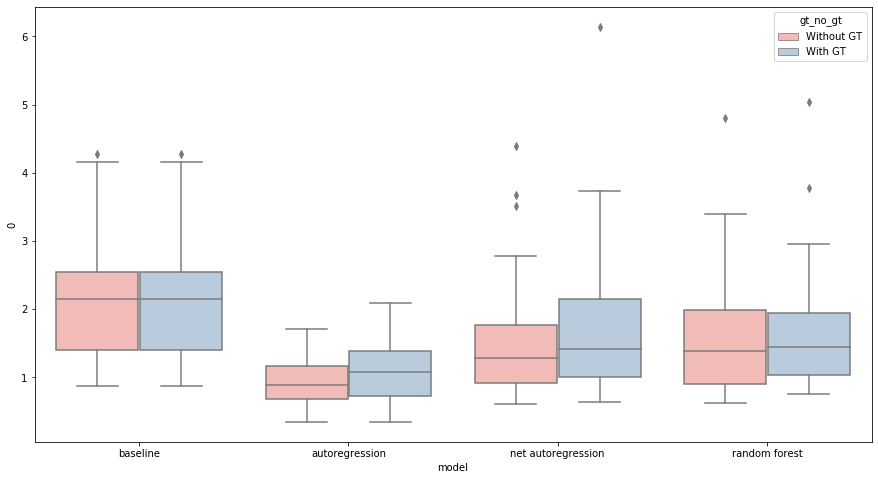

In [58]:
plt.figure(figsize = [15, 8])
sns.boxplot(x="model", y=0, hue="gt_no_gt", data=rmse_df, palette="Pastel1");